## Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

One option is to use Rivana: Download the data, unzip it, and work on it in a persistent environment.

The other option is to avoid opening the entire file at once, and instead work with chunks of the data. That's what this code does for you.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [ ]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [ ]:
# clean code
# start by looking for any NA's to handle

df.describe()


,year,id,hrs1,hrs2,occ,prestige,commute,prestg80,indus07,occonet,...,agehef8,agehef9,agehef11,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
count,24130.000000,24130.000000,13712.000000,479.000000,0.0,0.0,0.0,6431.000000,1814.000000,1847.000000,...,3.000000,2.000000,42.000000,3540.000000,843.000000,843.000000,1235.000000,1235.000000,24130.000000,24130.000000
mean,2015.050974,1660.270949,41.155849,38.970772,NaN,NaN,NaN,43.566475,555467.982359,355333.225322,...,33.666667,50.000000,4.904762,1.821469,1.000000,1.000000,1.000000,1.000000,0.996945,0.994487
std,5.526059,1106.843749,14.205623,13.059695,NaN,NaN,NaN,13.872802,182277.853905,127688.069583,...,56.580326,69.296465,14.943486,0.870081,1.252159,1.251813,1.266347,1.180530,0.804696,0.809929
min,2006.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN,17.000000,111211.000000,111011.000000,...,1.000000,1.000000,1.000000,1.000000,0.112206,0.049729,0.106381,0.090816,0.073972,0.076104
25%,2010.000000,763.000000,36.000000,35.000000,NaN,NaN,NaN,32.000000,446110.000000,254021.000000,...,1.000000,25.500000,1.000000,1.000000,0.364248,0.307250,0.358660,0.339571,0.509974,0.505924
50%,2016.000000,1525.000000,40.000000,40.000000,NaN,NaN,NaN,42.000000,561422.000000,395092.000000,...,1.000000,50.000000,2.000000,2.000000,0.628251,0.570879,0.598251,0.602136,0.783825,0.774566
75%,2021.000000,2337.750000,49.000000,45.000000,NaN,NaN,NaN,51.000000,623110.000000,439021.500000,...,50.000000,74.500000,4.000000,2.000000,1.188035,1.169048,1.089063,1.207341,1.185381,1.195842
max,2022.000000,4510.000000,89.000000,84.000000,NaN,NaN,NaN,86.000000,928120.000000,537121.000000,...,99.000000,99.000000,99.000000,9.000000,17.815383,16.167341,14.499165,13.168541,14.272462,17.003078


In [ ]:
print(df.shape)

(24130, 6694)


I start by looking for missing data. I see there are NaN values for the variables occ, prestige, and commute. The dimensions show that there are 24130 rows in the dataset, but there are NA's to handle since not all of the variables have 24130 observations. The variables with missing data include hrs1 (13712 observations), hrs2 (479 observations), occ (0 observations), prestige (0 observations), commute (0 observations), pretg80 (6431 observations), indus07 (1814 observations), occonet (1847 observations), agehef8 (3 observations), agehef9 (2 observations), agehef11 (42 observations), hompoph (3540 observations), wtssps_nea (843 observations), wtssnrps_nea (843 observations), wtssps_next (1235 observations), and wtssnrps_next (1235 observations).

In [ ]:
from os import truncate
# data imputation
# fill missing data (like mean/median)

# missing data in: 'hrs1', 'hrs2', 'occ', 'prestige', 'commute', 'prestg80', 'indus07', 'occonet', 'agehef8',
# 'agehef9', 'agehef11', 'hompoph', 'wtssps_nea', 'wtssnrps_nea', 'wtssps_next', and 'wtssnrps_next'

print("Number of misssing values before: \n", df.isnull().sum())

# before_sum = 0
# index = 0
# for variable in df.isnull().sum():
#     before_sum += df.isnull().sum()[index]
#     index += 1

# print("total number of missing values before: ", before_sum)

# for the numerical variables i will fill the missing data with mean values bc they hold numerical data
df['hrs1'].fillna(value = 0, inplace = True) # likely are not working
df['hrs2'].fillna(value = 0, inplace= True) # likely doesn't have a job
df['prestg80'].fillna(value = df['prestg80'].mean(), inplace=True)
df['indus07'].fillna(value = df['indus07'].mean(), inplace=True)
df['occonet'].fillna(value = df['occonet'].mean(), inplace=True)
df['hompoph'].fillna(value = df['hompoph'].mean(), inplace=True)
df['wtssps_nea'].fillna(value = df['wtssps_nea'].mean(), inplace=True)
df['wtssps_next'].fillna(value = df['wtssps_next'].mean(), inplace=True)

# since 'occ', 'prestige', and 'commute' have no observations, i will drop the columns
df = df.drop(columns=['occ', 'prestige', 'commute', 'agehef8', 'agehef9', 'agehef11', 'wtssnrps_nea', 'wtssnrps_next'], axis = 1)

print("Number of misssing values after: \n", df.isnull().sum())

# after_sum = 0
# index2 = 0
# for variable in df.isnull().sum():
#     after_sum += df.isnull().sum()[index2]
#     index2 += 1

# print("total number of missing values before: ", after_sum)
df.describe()

Number of misssing values before: 
 year                 0
id                   0
wrkstat             31
hrs1             10418
hrs2             23651
                 ...  
wtssnrps_nea     23287
wtssps_next      22895
wtssnrps_next    22895
wtsscomp             0
wtsscompnr           0
Length: 6694, dtype: int64
Number of misssing values after: 
 year            0
id              0
wrkstat        31
hrs1            0
hrs2            0
               ..
hompoph         0
wtssps_nea      0
wtssps_next     0
wtsscomp        0
wtsscompnr      0
Length: 6686, dtype: int64


,year,id,hrs1,hrs2,prestg80,indus07,occonet,prestg10,prestg105plus,indus10,...,agehef3,agehef4,agehef5,agehef6,agehef7,hompoph,wtssps_nea,wtssps_next,wtsscomp,wtsscompnr
count,24130.000000,24130.000000,24130.000000,24130.000000,24130.000000,24130.000000,24130.000000,23001.000000,15802.000000,22945.000000,...,772.000000,277.000000,69.000000,17.000000,4.0,24130.000000,24130.000000,24130.000000,24130.000000,24130.000000
mean,2015.050974,1660.270949,23.387029,0.773601,43.566475,555467.982359,355333.225322,44.439024,47.725541,6358.691828,...,3.505181,4.386282,7.797101,7.647059,25.5,1.821469,1.000000,1.000000,0.996945,0.994487
std,5.526059,1106.843749,23.027099,5.738410,7.161434,49964.684222,35318.032990,13.541252,25.698587,2682.193044,...,10.434838,14.097701,22.835460,23.571543,49.0,0.333219,0.233908,0.286379,0.804696,0.809929
min,2006.000000,1.000000,0.000000,0.000000,17.000000,111211.000000,111011.000000,16.000000,5.000000,170.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,0.112206,0.106381,0.073972,0.076104
25%,2010.000000,763.000000,0.000000,0.000000,43.566475,555467.982359,355333.225322,34.000000,26.000000,4870.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.821469,1.000000,1.000000,0.509974,0.505924
50%,2016.000000,1525.000000,25.000000,0.000000,43.566475,555467.982359,355333.225322,45.000000,48.000000,7390.000000,...,2.000000,2.000000,2.000000,1.000000,1.0,1.821469,1.000000,1.000000,0.783825,0.774566
75%,2021.000000,2337.750000,40.000000,0.000000,43.566475,555467.982359,355333.225322,53.000000,68.000000,8190.000000,...,4.000000,4.000000,4.000000,3.000000,25.5,1.821469,1.000000,1.000000,1.185381,1.195842
max,2022.000000,4510.000000,89.000000,84.000000,86.000000,928120.000000,537121.000000,80.000000,97.000000,9870.000000,...,99.000000,99.000000,99.000000,99.000000,99.0,9.000000,17.815383,14.499165,14.272462,17.003078


##Defining the Project Problem and Importance:

The GSS is one of the most immense collections of survey data ever collected. The survey covers respondents informatin regarding age, gender, race / ethnicity, education level, marital status, employment status, and so much more.


Income inequality is a significant societal issue. By analyzing income disparities across demogrpahic groups, our group aims to identify which subsets of people are most affected by this disparity. By examining income levels by various factors, our team aims to uncover patterns of inequality that can be used to motivate a response to address them.


Additonally, by better understanding relationships between income and these varying factors, researchers may be better able to understand something as complex as societal dynamics and human behavior. <br>

Whatever the reason may be further understanding this complex topic, our goal is not to address one external motivator or another (such as policy influence of psychological influence). Instead, our team simply aims to highlight income disparity within the following demographic variables:

**year** - Year response was collected

**sex** - Respondent's sex

**age** - Respondent's age

**race** - Respondent's race

**marital** - Respondent's marital status

**health** - Respondent's health: excellent, good, fair, poor

**degree** - Respondent's highest level of schooling or degree earned

Lastly, the income variable chosen was:

**conrinc** - Respondent's infaltion adjusted personal income. Chosen as it is frequently asked throughout the years, while adjusting for changes in dollar values across the 16 years of the survey that we are working worth (2006-2022)

Did not consider work status as the primary aim of this project pertains to the effect demographic variables have on income.





In [54]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,industry,occ80,...,agehef7,agehef10,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssps_next,wtsscomp,wtsscompnr
0,2006,1751,working full time,40.0,0.0,NaN,someone else,government,NaN,"electronic repairers, communications and indus...",...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,1.079141,0.961150
1,2006,1752,in school,0.0,0.0,yes,someone else,private,NaN,"child care workers, private household",...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,7.673834,6.641571
2,2006,1753,working full time,35.0,0.0,NaN,someone else,government,NaN,civil engineers,...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,0.584663,0.512145
3,2006,1754,working full time,50.0,0.0,NaN,someone else,government,NaN,"machine operators, not specified",...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,0.715731,0.637592
4,2006,1755,working full time,40.0,0.0,NaN,someone else,private,NaN,accountants and auditors,...,NaN,NaN,NaN,NaN,NaN,1.821469,1.0,1.0,1.094831,0.956094


In [55]:
data=df[['year','conrinc','sex', 'age','race', 'marital','health','degree']]
data.head()

,year,conrinc,sex,age,race,marital,health,degree
0,2006,59542.0,male,48.0,white,married,poor,high school
1,2006,7939.0,male,25.0,white,never married,NaN,bachelor's
2,2006,59542.0,male,42.0,white,divorced,NaN,bachelor's
3,2006,33079.0,male,24.0,white,never married,good,high school
4,2006,33079.0,female,24.0,white,married,excellent,bachelor's


In [56]:
#Overarching understanidng of Inflation adjusted income

data['conrinc'].describe()

count     14105.000000
mean      37417.506036
std       42008.960574
min         336.000000
25%       13048.750000
50%       26991.250000
75%       45677.500000
max      434612.415694
Name: conrinc, dtype: float64

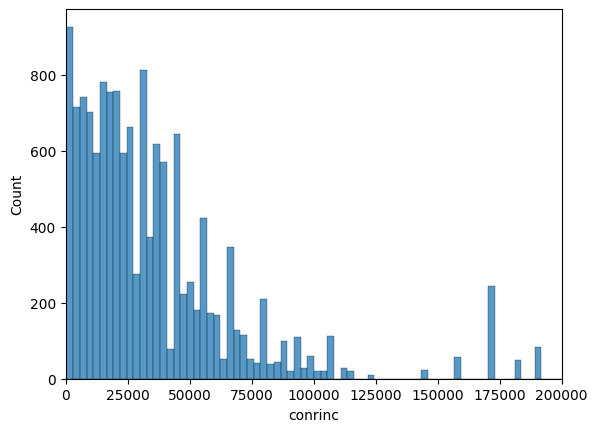

In [58]:
sns.histplot(data=data, x='conrinc')
plt.xlim(0, 200000)
plt.show() #Exclduing reported income of 200k-400k to get a better understanding

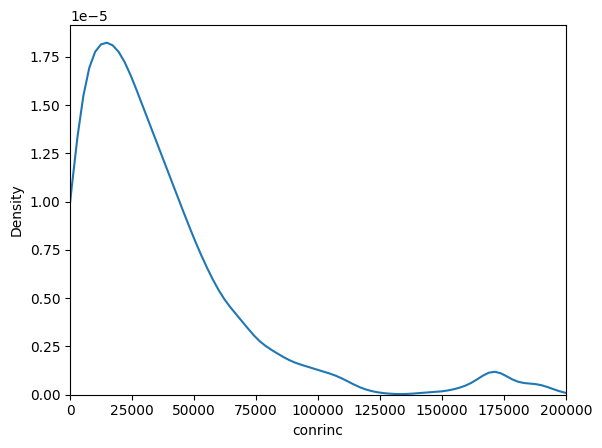

In [61]:
sns.kdeplot(df['conrinc'])
plt.xlim(0, 200000)
plt.show() #Exclduing reported income of 200k-400k to get a better understanding
#Just like histogram, reveals a curve weighted towards the right indicating
# the mean is likely skewed to a higher value. Median is likely better interpretation

In [62]:
data['conrinc'].median()
#About 11,000 lower which is not surpring after seeing denisty and hist plot
#Median will be used as the measure of comparison instead

26991.25

So for rest of the viz I think comparison can be done within variables however. But the comparison across different groups in eahc variable I think should be judged according to median because the mean is too skewed.

In [ ]:
# Start of inner variable viz